In [1]:
import pandas_datareader as web
import numpy as np
import pandas as pd 
import math
from scipy import stats
import matplotlib
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


%matplotlib inline

In [2]:
inizio = '2016-01-01'
fine = '2021-01-19'

leg_1='EURUSD=x'
leg_2='GBPUSD=x'
leg_3='AUDUSD=x'
leg_4='NZDUSD=x'

#leg_1='SPY'
#leg_2='QQQ'
#leg_3='DIA'
#leg_4='IWM'

df1 = web.DataReader(leg_1, data_source='yahoo', start=inizio, end=fine)

df2 = web.DataReader(leg_2, data_source='yahoo', start=inizio, end=fine)

df3 = web.DataReader(leg_3, data_source='yahoo', start=inizio, end=fine)

df4 = web.DataReader(leg_4, data_source='yahoo', start=inizio, end=fine)

<AxesSubplot:xlabel='Date'>

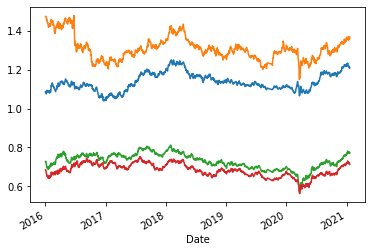

In [3]:
df1['Close'].plot()
df2['Close'].plot()
df3['Close'].plot()
df4['Close'].plot()

In [4]:
period=200
slope=[]
# r numero punti di calcolo
r=20
#r_sup limite superiore del range reale
r_sup=4


for i in range(r):
    a=1
    b=(r_sup*2/r*i-r_sup)
    for ii in range(r):
        c=(r_sup*2/r*ii-r_sup)
        for iii in range(r):
            d=(r_sup*2/r*iii-r_sup)
            spread=df1*a+df2*b+c*df3+d*df4
            close=spread['Close']
            close=close.tail(period)
            close=close.reset_index()
            X=np.array(close.index).reshape(-1,1)
            Y=close['Close']
            lr1=stats.linregress(X.reshape(period),Y)
            slope.append([b,c,d,lr1.slope, lr1.rvalue**2])

,b,c,d,slope,r2
0,-4.0,-4.0,-4.0,0.006404,0.875299
1,-4.0,-4.0,-3.6,0.006185,0.874192
2,-4.0,-4.0,-3.2,0.005967,0.872928
3,-4.0,-4.0,-2.8,0.005749,0.871479
4,-4.0,-4.0,-2.4,0.005530,0.869815
...,...,...,...,...,...
7995,3.6,3.6,2.0,0.006204,0.876537
7996,3.6,3.6,2.4,0.006423,0.877964
7997,3.6,3.6,2.8,0.006641,0.879210
7998,3.6,3.6,3.2,0.006860,0.880301


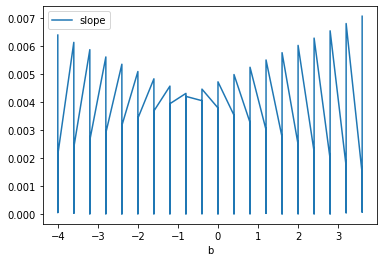

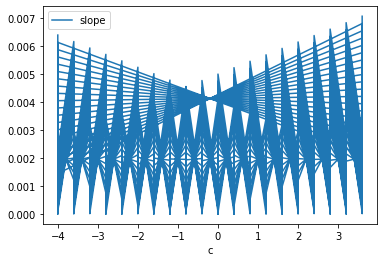

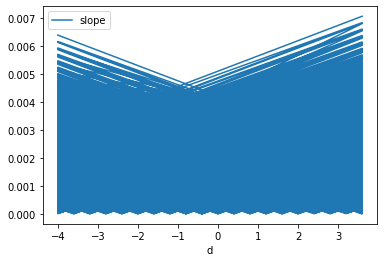

In [5]:
res=pd.DataFrame(slope, columns= ['b','c','d','slope','r2'])
res['slope']=res['slope'].abs()
res.plot(x='b',y='slope')
res.plot(x='c',y='slope')
res.plot(x='d',y='slope')
res

In [6]:
res.to_clipboard()

In [7]:
res_f=res[res['r2']>0]

In [8]:
res_f=res_f.sort_values('slope')

In [9]:
res_f.head()

,b,c,d,slope,r2
1814,-2.4,0.0,1.6,2.276800e-07,1.615572e-07
5821,1.6,0.4,-3.6,3.517077e-07,2.778322e-07
6809,2.8,-4.0,-0.4,1.401491e-06,2.573556e-06
4150,0.0,-1.2,0.0,1.534452e-06,6.900417e-05
3485,-0.8,1.6,-2.0,1.658480e-06,2.153022e-05


<AxesSubplot:xlabel='Date'>

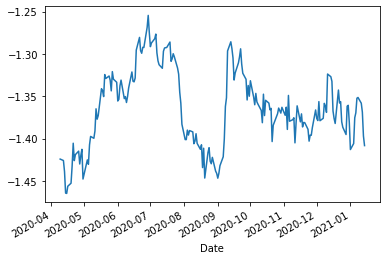

In [408]:
a=1
b=res_f.iat[0,0]
c=res_f.iat[0,1]
d=res_f.iat[0,2]
spread=df1*a+df2*b+c*df3+d*df4
spread['Close'][-period:].plot()